In [33]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import TargetEncoder

## –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö (—Ç–∏–ø–æ)

In [34]:
data = pd.read_csv("../data/bmw_preprocessed.csv")
data

–°–µ—Ä–∏—è           –ü–æ–∫–æ–ª–µ–Ω–∏–µ              –ö—É–∑–æ–≤   –ì–æ–¥  –†–µ—Å—Ç–∞–π–ª–∏–Ω–≥  \
0     1 —Å–µ—Ä–∏—è                 F40      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  2019           0   
1     7 —Å–µ—Ä–∏—è                 G12              —Å–µ–¥–∞–Ω  2019           1   
2     5 —Å–µ—Ä–∏—è                 E39              —Å–µ–¥–∞–Ω  1999           0   
3     1 —Å–µ—Ä–∏—è  E81, E82, E88, E87      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  2005           0   
4          X6                 E71  –≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  2012           1   
...       ...                 ...                ...   ...         ...   
2788       X6                 E71  –≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  2011           0   
2789  5 —Å–µ—Ä–∏—è            F10, F11              —Å–µ–¥–∞–Ω  2012           0   
2790  4 —Å–µ—Ä–∏—è       F32, F33, F36               –∫—É–ø–µ  2013           0   
2791  2 —Å–µ—Ä–∏—è                 F45            –º–∏–Ω–∏–≤—ç–Ω  2017           0   
2792  7 —Å–µ—Ä–∏—è                 E65              —Å–µ–¥–∞–Ω  2002           0   

      –ü—Ä–æ–±–µ–≥   –ö–æ—Ä–æ–±–∫–∞  –û–±—ä–µ–º –¢–æ–ø–ª–∏–≤–æ   –¶–µ–Ω–∞  
0     129000     —Ä–æ–±–æ—Ç  1,5¬†–ª  –¥–∏–∑–µ–ª—å  16999  
1      35000   –∞–≤—Ç–æ–º–∞—Ç  3,0¬†–ª  –¥–∏–∑–µ–ª—å  83777  
2     400000  –º–µ—Ö–∞–Ω–∏–∫–∞  2,5¬†–ª  –¥–∏–∑–µ–ª—å   3399  
3     370000   –∞–≤—Ç–æ–º–∞—Ç  2,0¬†–ª  –±–µ–Ω–∑–∏–Ω   7200  
4     149000   –∞–≤—Ç–æ–º–∞—Ç  3,0¬†–ª  –±–µ–Ω–∑–∏–Ω  23450  
...      ...       ...    ...     ...    ...  
2788  277000   –∞–≤—Ç–æ–º–∞—Ç  3,0¬†–ª  –¥–∏–∑–µ–ª—å  22290  
2789  256000   –∞–≤—Ç–æ–º–∞—Ç  3,0¬†–ª  –¥–∏–∑–µ–ª—å  23500  
2790  268500   –∞–≤—Ç–æ–º–∞—Ç  2,0¬†–ª  –±–µ–Ω–∑–∏–Ω  21500  
2791  200000  –º–µ—Ö–∞–Ω–∏–∫–∞  1,5¬†–ª  –¥–∏–∑–µ–ª—å  13000  
2792  280000   –∞–≤—Ç–æ–º–∞—Ç  3,6¬†–ª  –±–µ–Ω–∑–∏–Ω   6300  

[2793 rows x 10 columns]

In [35]:
# –£–±–∏—Ä–∞–µ–º –≤—Å–µ –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Å –ø—Ä–∏–∫–æ–ª—Ö–æ–∂–µ–Ω–Ω—ã–º –ø—Ä–æ–ø–∞–Ω–æ–º-–±—É—Ç–∞–Ω–æ–º –∫ –º–∞—à–∏–Ω–µ (27 —à—Ç.)
data = data[data['–¢–æ–ø–ª–∏–≤–æ'] != '–±–µ–Ω–∑–∏–Ω (–ø—Ä–æ–ø–∞–Ω-–±—É—Ç–∞–Ω)']
data['–¢–æ–ø–ª–∏–≤–æ'].value_counts()

–¢–æ–ø–ª–∏–≤–æ
–±–µ–Ω–∑–∏–Ω    1450
–¥–∏–∑–µ–ª—å    1316
Name: count, dtype: int64

In [36]:
# –£–±–∏—Ä–∞–µ–º –∞–≤—Ç–æ–º–æ–±–∏–∏–ª–∏ —Å –∫—É–∑–æ–≤–æ–º "—Ä–æ–¥—Å—Ç–µ—Ä" (3 —à—Ç.)
data = data[data['–ö—É–∑–æ–≤'] != '—Ä–æ–¥—Å—Ç–µ—Ä']
data['–ö—É–∑–æ–≤'].value_counts()

–ö—É–∑–æ–≤
—Å–µ–¥–∞–Ω                1161
–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.     879
—É–Ω–∏–≤–µ—Ä—Å–∞–ª             289
–ª–∏—Ñ—Ç–±–µ–∫               130
–º–∏–Ω–∏–≤—ç–Ω                91
–∫—É–ø–µ                   79
—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.          71
–∫–∞–±—Ä–∏–æ–ª–µ—Ç              39
—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.          24
Name: count, dtype: int64

In [37]:
# –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –ø—Ä–æ–±–µ–≥ –±–æ–ª—å—à–µ 600000
data = data[data['–ü—Ä–æ–±–µ–≥'] <= 600000]
data['–ü—Ä–æ–±–µ–≥'].value_counts(bins=10)

(60912.6, 120811.2]              440
(120811.2, 180709.8]             412
(180709.8, 240608.4]             379
(240608.4, 300507.0]             350
(415.01300000000003, 60912.6]    328
(300507.0, 360405.6]             326
(360405.6, 420304.2]             244
(420304.2, 480202.8]             134
(480202.8, 540101.4]             100
(540101.4, 600000.0]              32
Name: count, dtype: int64

In [38]:
# –£–¥–∞–ª—è–µ–º –∞–≤—Ç–æ–º–æ–±–∏–ª–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –æ–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª—è –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –º–µ–Ω–µ–µ 10 —Ä–∞–∑
volume_counts = data['–û–±—ä–µ–º'].value_counts()
volumes_to_keep = volume_counts[volume_counts >= 10].index
data = data[data['–û–±—ä–µ–º'].isin(volumes_to_keep)]
data['–û–±—ä–µ–º'].value_counts()

–û–±—ä–µ–º
2,0¬†–ª    989
3,0¬†–ª    878
2,5¬†–ª    243
1,5¬†–ª    242
4,4¬†–ª     96
2,9¬†–ª     70
1,6¬†–ª     55
1,8¬†–ª     42
2,8¬†–ª     26
2,2¬†–ª     26
1,9¬†–ª     21
4,8¬†–ª     20
Name: count, dtype: int64

In [39]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª—è –≤ —á–∏—Å–ª–æ
def parse_volume_to_float(volume_str):
    # –£–¥–∞–ª—è–µ–º –Ω–µ—Ä–∞–∑—Ä—ã–≤–Ω—ã–µ –ø—Ä–æ–±–µ–ª—ã –∏ –±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ (–∑–∞–º–µ–Ω—è–µ–º –∑–∞–ø—è—Ç—É—é –Ω–∞ —Ç–æ—á–∫—É)
    if isinstance(volume_str, str):
        num = re.match(r"([\d,\.]+)", volume_str.replace('\xa0', ''))
        if num:
            return float(num.group(1).replace(',', '.'))
    return None

data['–û–±—ä–µ–º'] = data['–û–±—ä–µ–º'].apply(parse_volume_to_float)
data['–û–±—ä–µ–º'].info()

<class 'pandas.core.series.Series'>
Index: 2708 entries, 0 to 2791
Series name: –û–±—ä–µ–º
Non-Null Count  Dtype  
--------------  -----  
2708 non-null   float64
dtypes: float64(1)
memory usage: 42.3 KB


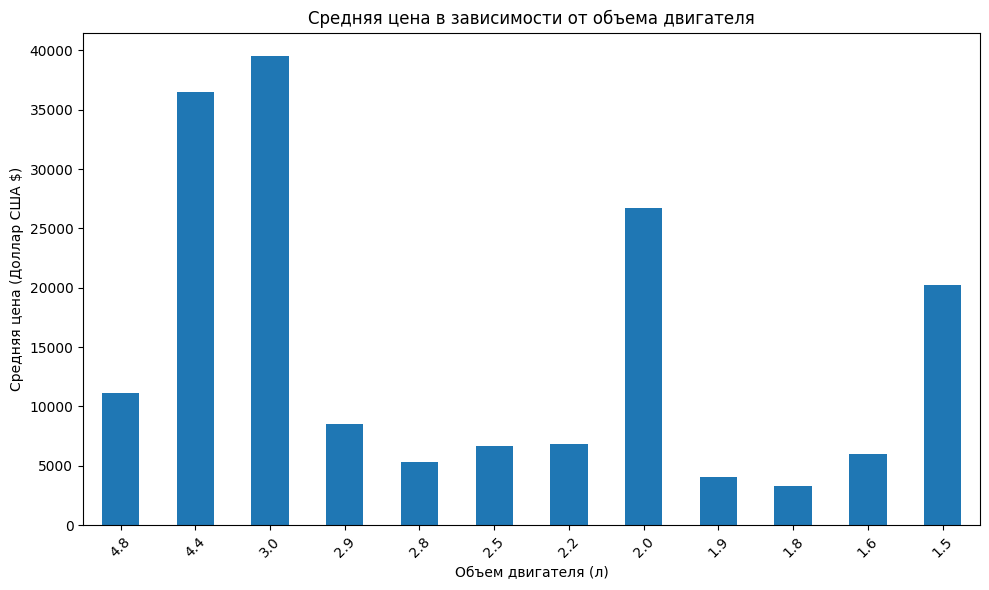

In [40]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –∏ —Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é —Ü–µ–Ω—ã, –Ω–æ –∏–Ω–¥–µ–∫—Å—ã (–æ–±—ä–µ–º—ã) —Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —É–±—ã–≤–∞–Ω–∏—é –æ–±—ä–µ–º–∞
avg_price_by_volume = (
    data.groupby(['–û–±—ä–µ–º'])['–¶–µ–Ω–∞']
    .mean()
    .reset_index()
    .sort_values('–û–±—ä–µ–º', ascending=False)
    .set_index('–û–±—ä–µ–º')
)['–¶–µ–Ω–∞']

plt.figure(figsize=(10, 6))
avg_price_by_volume.plot(kind='bar')
plt.xlabel('–û–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª—è (–ª)')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ (–î–æ–ª–ª–∞—Ä –°–®–ê $)')
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ–±—ä–µ–º–∞ –¥–≤–∏–≥–∞—Ç–µ–ª—è')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# –£–¥–∞–ª—è–µ–º –∞–≤—Ç–æ–º–æ–±–∏–ª–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –ø–æ–∫–æ–ª–µ–Ω–∏–µ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –º–µ–Ω–µ–µ 10 —Ä–∞–∑
generation_counts = data['–ü–æ–∫–æ–ª–µ–Ω–∏–µ'].value_counts()
generations_to_keep = generation_counts[generation_counts >= 10].index
data = data[data['–ü–æ–∫–æ–ª–µ–Ω–∏–µ'].isin(generations_to_keep)]
data['–ü–æ–∫–æ–ª–µ–Ω–∏–µ'].value_counts()

–ü–æ–∫–æ–ª–µ–Ω–∏–µ
E39                   246
G30, G31              170
G01                   149
E60, E61              130
E46                   111
F48                   109
G05                   103
G20, G21              101
F30, F31              100
E70                    89
E36                    87
F10, F11               83
E90, E91, E92, E93     70
F46                    66
F44                    64
E53                    63
E71                    58
G22, G23, G26          51
F32, F33, F36          51
F15                    49
E34                    48
I                      46
F01, F04               44
F07                    40
G02                    36
F39                    34
F40                    32
F25                    29
E38                    29
E65, E66               27
E65                    27
F02                    26
G32                    25
G12                    24
G06                    24
F45                    23
E81, E82, E88, E87     22
F34                

In [42]:
data.groupby('–ü–æ–∫–æ–ª–µ–Ω–∏–µ')['–¶–µ–Ω–∞'].mean()

–ü–æ–∫–æ–ª–µ–Ω–∏–µ
E34                    2887.250000
E36                    2802.298851
E38                    6065.137931
E39                    6025.747967
E46                    5847.153153
E53                   11188.253968
E60, E61              11553.946154
E65                    9177.666667
E65, E66              11065.407407
E70                   18203.550562
E71                   19727.689655
E81, E82, E88, E87     7609.045455
E83                   10280.500000
E84                   12853.333333
E90, E91, E92, E93    10700.900000
F01, F04              18849.931818
F02                   18190.230769
F07                   18675.075000
F10, F11              19628.638554
F15                   34706.632653
F16                   40891.266667
F20, F21              15292.450000
F25                   18738.551724
F30, F31              19412.180000
F32, F33, F36         26527.039216
F34                   23595.454545
F39                   25146.058824
F40                   21430.343750
F

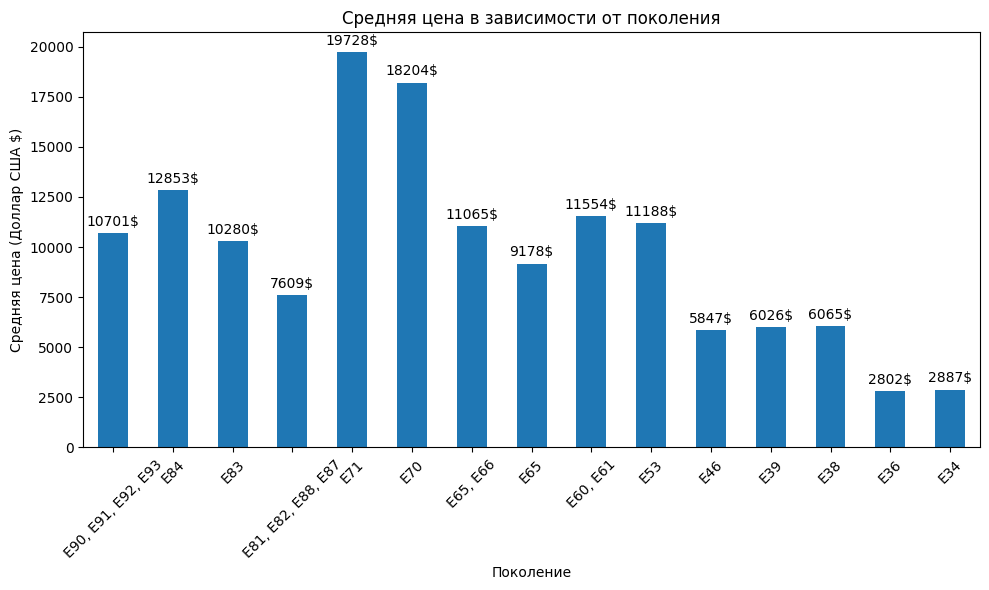

In [43]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –∏ —Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é —Ü–µ–Ω—ã, –Ω–æ –∏–Ω–¥–µ–∫—Å—ã (–æ–±—ä–µ–º—ã) —Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —É–±—ã–≤–∞–Ω–∏—é –æ–±—ä–µ–º–∞
avg_price_by_generation = (
    data
    .where(data['–ü–æ–∫–æ–ª–µ–Ω–∏–µ'].str.startswith('E'))
    .groupby(['–ü–æ–∫–æ–ª–µ–Ω–∏–µ'])['–¶–µ–Ω–∞']
    .mean()
    .reset_index()
    .sort_values('–ü–æ–∫–æ–ª–µ–Ω–∏–µ', ascending=False)
    .set_index('–ü–æ–∫–æ–ª–µ–Ω–∏–µ')
)['–¶–µ–Ω–∞']

plt.figure(figsize=(10, 6))
ax = avg_price_by_generation.plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.0f$', padding=3)  # fmt –∑–∞–¥–∞—ë—Ç —Ñ–æ—Ä–º–∞—Ç —á–∏—Å–µ–ª
plt.xlabel('–ü–æ–∫–æ–ª–µ–Ω–∏–µ')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ (–î–æ–ª–ª–∞—Ä –°–®–ê $)')
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–∫–æ–ª–µ–Ω–∏—è')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\trxxnk\AppData\Local\Temp\ipykernel_9460\341169350.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e60_61['–ü—Ä–æ–±–µ–≥_–≥—Ä—É–ø–ø–∞'] = pd.cut(e60_61['–ü—Ä–æ–±–µ–≥'], bins=bins, labels=labels, right=False, include_lowest=True)
C:\Users\trxxnk\AppData\Local\Temp\ipykernel_9460\341169350.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('–ü—Ä–æ–±–µ–≥_–≥—Ä—É–ø–ø–∞')['–¶–µ–Ω–∞']


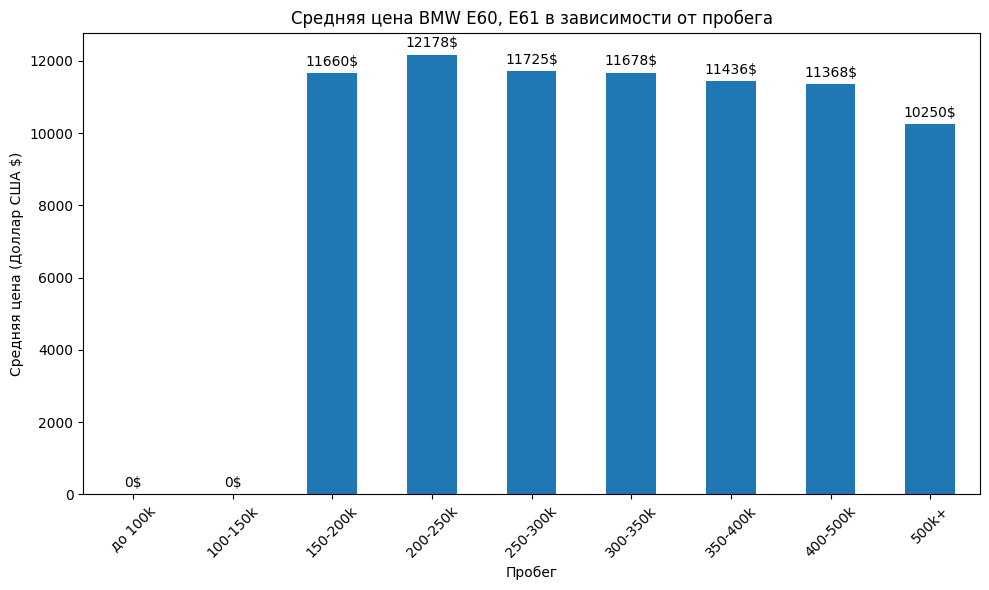

In [44]:
# –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ø–æ–∫–æ–ª–µ–Ω–∏—è E60, E61 –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–æ–±–µ–≥–∞

# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ E60, E61
e60_61 = data[data['–ü–æ–∫–æ–ª–µ–Ω–∏–µ'] == 'E60, E61']

# –ë–∏–Ω–Ω–∏–Ω–≥ –ø—Ä–æ–±–µ–≥–∞ –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ 50 000 –∫–º)
bins = [0, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 500000, 600000]
labels = [
    '–¥–æ 100k', '100-150k', '150-200k', '200-250k', '250-300k',
    '300-350k', '350-400k', '400-500k', '500k+'
]
e60_61['–ü—Ä–æ–±–µ–≥_–≥—Ä—É–ø–ø–∞'] = pd.cut(e60_61['–ü—Ä–æ–±–µ–≥'], bins=bins, labels=labels, right=False, include_lowest=True)

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –ø–æ –≥—Ä—É–ø–ø–∞–º –ø—Ä–æ–±–µ–≥–∞
avg_price_by_mileage = (
    e60_61
    .groupby('–ü—Ä–æ–±–µ–≥_–≥—Ä—É–ø–ø–∞')['–¶–µ–Ω–∞']
    .mean()
    .reindex(labels)  # —á—Ç–æ–±—ã –ø–æ—Ä—è–¥–æ–∫ –±—ã–ª –∫–∞–∫ –≤ labels
)

plt.figure(figsize=(10, 6))
ax = avg_price_by_mileage.plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.0f$', padding=3)
plt.xlabel('–ü—Ä–æ–±–µ–≥')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ (–î–æ–ª–ª–∞—Ä –°–®–ê $)')
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ BMW E60, E61 –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–æ–±–µ–≥–∞')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\trxxnk\AppData\Local\Temp\ipykernel_9460\1455767624.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_bin = temp.groupby('–ì–æ–¥_–≥—Ä—É–ø–ø–∞')['–¶–µ–Ω–∞'].mean().dropna()


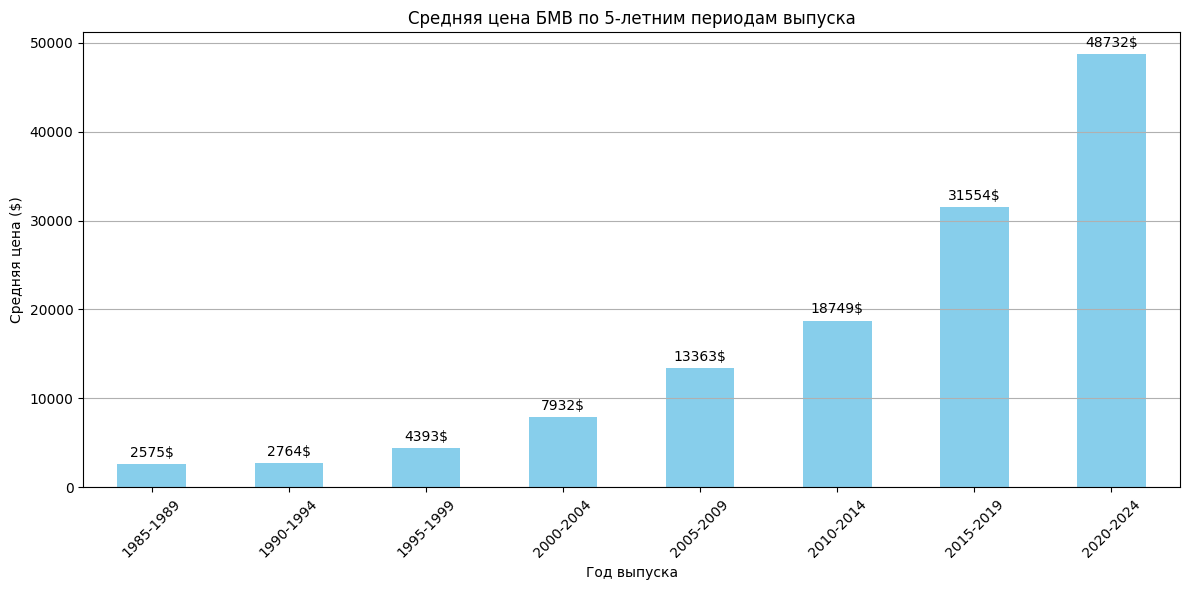

In [45]:
# –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ë–ú–í –ø–æ 5-–ª–µ—Ç–Ω–∏–º –ø–µ—Ä–∏–æ–¥–∞–º –≤—ã–ø—É—Å–∫–∞
bins = range(1985, 2030, 5)  # 1985-1990, 1990-1995, ...
labels = [f"{start}-{end-1}" for start, end in zip(bins[:-1], bins[1:])]  # –ü–æ–¥–ø–∏—Å–∏: "1985-1989", "1990-1994"...

temp = data[['–ì–æ–¥', '–¶–µ–Ω–∞']].copy()

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ –±–∏–Ω–∞–º
temp['–ì–æ–¥_–≥—Ä—É–ø–ø–∞'] = pd.cut(
    temp['–ì–æ–¥'],
    bins=bins,
    labels=labels,
    right=False  # –ò–Ω—Ç–µ—Ä–≤–∞–ª [start, end), —Ç.–µ. 1985-1989, 1990-1994...
)

avg_price_by_bin = temp.groupby('–ì–æ–¥_–≥—Ä—É–ø–ø–∞')['–¶–µ–Ω–∞'].mean().dropna()

plt.figure(figsize=(12, 6))
ax = avg_price_by_bin.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0], fmt='%.0f$', padding=3)
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ë–ú–í –ø–æ 5-–ª–µ—Ç–Ω–∏–º –ø–µ—Ä–∏–æ–¥–∞–º –≤—ã–ø—É—Å–∫–∞')
plt.xlabel('–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

–ù–∞–±–ª—é–¥–µ–Ω–∏–µ: –ø—Ä–∏ —Å–º–µ–Ω–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–Ω—Ç—Ä–µ–≤–∞–ª–æ–≤ –º–æ–∂–µ—Ç —Å–∏–ª—å–Ω–æ –º–µ–Ω—è—Ç—å—Å—è —Ü–µ–Ω–∞; –∏–¥–µ—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ/–æ–∫–æ–Ω–Ω–æ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ

C:\Users\trxxnk\AppData\Local\Temp\ipykernel_9460\2911834804.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_bin = temp.groupby('–ì–æ–¥_–≥—Ä—É–ø–ø–∞')['–¶–µ–Ω–∞'].mean().dropna()


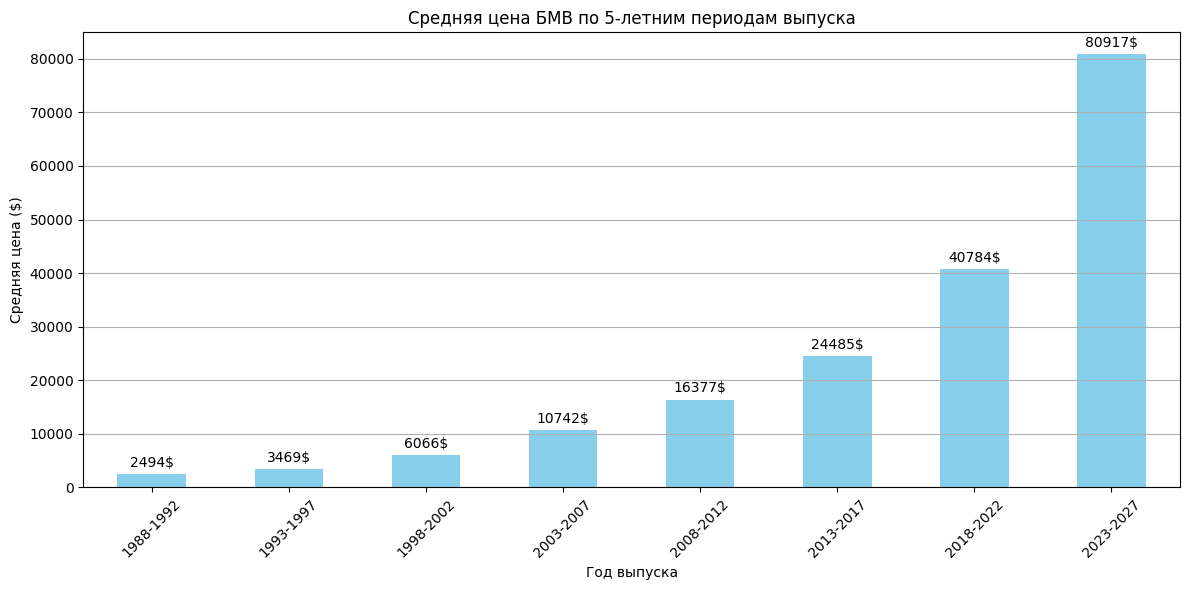

In [46]:
# –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ë–ú–í –ø–æ 5-–ª–µ—Ç–Ω–∏–º –ø–µ—Ä–∏–æ–¥–∞–º –≤—ã–ø—É—Å–∫–∞
bins = range(1988, 2030, 5)  # 1985-1990, 1990-1995, ...
labels = [f"{start}-{end-1}" for start, end in zip(bins[:-1], bins[1:])]  # –ü–æ–¥–ø–∏—Å–∏: "1985-1989", "1990-1994"...

temp = data[['–ì–æ–¥', '–¶–µ–Ω–∞']].copy()

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ –±–∏–Ω–∞–º
temp['–ì–æ–¥_–≥—Ä—É–ø–ø–∞'] = pd.cut(
    temp['–ì–æ–¥'],
    bins=bins,
    labels=labels,
    right=False  # –ò–Ω—Ç–µ—Ä–≤–∞–ª [start, end), —Ç.–µ. 1985-1989, 1990-1994...
)

avg_price_by_bin = temp.groupby('–ì–æ–¥_–≥—Ä—É–ø–ø–∞')['–¶–µ–Ω–∞'].mean().dropna()

plt.figure(figsize=(12, 6))
ax = avg_price_by_bin.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0], fmt='%.0f$', padding=3)
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ë–ú–í –ø–æ 5-–ª–µ—Ç–Ω–∏–º –ø–µ—Ä–∏–æ–¥–∞–º –≤—ã–ø—É—Å–∫–∞')
plt.xlabel('–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [47]:
# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é DataFrame –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π
data_encoded = data.copy()

### 1. –ö–æ—Ä–æ–±–∫–∞

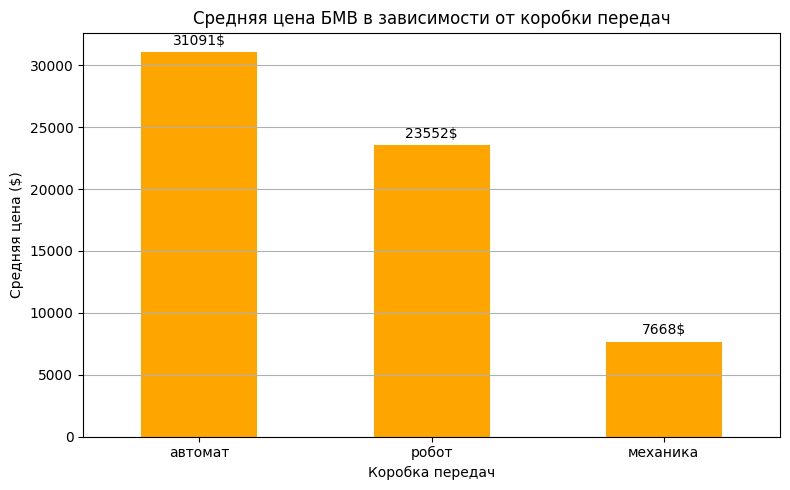

In [48]:
# –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –∫–æ—Ä–æ–±–∫–∏ –ø–µ—Ä–µ–¥–∞—á
avg_price_by_gearbox = data.groupby('–ö–æ—Ä–æ–±–∫–∞')['–¶–µ–Ω–∞'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
ax = avg_price_by_gearbox.plot(kind='bar', color='orange')
ax.bar_label(ax.containers[0], fmt='%.0f$', padding=3)
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ë–ú–í –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ—Ä–æ–±–∫–∏ –ø–µ—Ä–µ–¥–∞—á')
plt.xlabel('–ö–æ—Ä–æ–±–∫–∞ –ø–µ—Ä–µ–¥–∞—á')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [49]:
data['–ö–æ—Ä–æ–±–∫–∞'].value_counts()

–ö–æ—Ä–æ–±–∫–∞
–∞–≤—Ç–æ–º–∞—Ç     1927
–º–µ—Ö–∞–Ω–∏–∫–∞     536
—Ä–æ–±–æ—Ç        150
Name: count, dtype: int64

–¢–∞–∫ –∫–∞–∫ –ë–ú–í —Å –ê–ö–ü–ü –≤ —Å—Ä–µ–¥–Ω–µ–º —Å–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ –∏ –Ω–∞ –ú–ö–ü–ü —Å–∞–º—ã–µ –¥–µ—à–µ–≤—ã–µ, –∞ —Ü–µ–ª–µ–≤–æ–π –º–µ—Ç–∫–æ–π —è–≤–ª—è–µ—Ç—Å—è —Ü–µ–Ω–∞, —Ç–æ –ª–æ–≥–∏—á–Ω–µ–µ –±—É–¥–µ—Ç –ø—Ä–∏–º–µ–Ω–∏—Ç—å Label Encoding –ø–æ —Å–ª–µ–¥—É—é—â–µ–º—É –ø—Ä–∞–≤–∏–ª—É:
- –ê–≤—Ç–æ–º–∞—Ç ‚Üí 2
- –†–æ–±–æ—Ç ‚Üí 1
- –ú–µ—Ö–∞–Ω–∏–∫–∞ ‚Üí 0

**–ü—Ä–∏–º–µ—á–∞–Ω–∏–µ**: –ø–æ–ø—Ä–±–æ–≤–∞—Ç—å encoding —Å —É—á–µ—Ç–æ–º —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω—ã (–Ω-—Ä, –∞–≤—Ç–æ–º–∞—Ç –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∞ 10–∫$ –¥–æ—Ä–æ–∂–µ —Ä–æ–±–æ—Ç–∞, –∞ –º–µ—Ö–∞–Ω–∏–∫–∞ –¥–µ—à–µ–≤–ª–µ –∏—Ö –æ–±–æ–∏—Ö –Ω–∞ +- 20–∫$, —Ç.–µ. –º–µ—Ö–∞–Ω–∏–∫–∞ ‚Üí 0, —Ä–æ–±–æ—Ç ‚Üí 0.77, –∞–≤—Ç–æ–º–∞—Ç ‚Üí 1)

In [50]:
# –ö–æ—Ä–æ–±–∫–∞ –ø–µ—Ä–µ–¥–∞—á ‚Üí Label Encoding —Å –∑–∞–¥–∞–Ω–Ω—ã–º –ø–æ—Ä—è–¥–∫–æ–º
box_order = ['–º–µ—Ö–∞–Ω–∏–∫–∞', '—Ä–æ–±–æ—Ç', '–∞–≤—Ç–æ–º–∞—Ç']  # –Ø–≤–Ω–æ –∑–∞–¥–∞–µ–º –ø–æ—Ä—è–¥–æ–∫
data_encoded['–ö–æ—Ä–æ–±–∫–∞'] = data_encoded['–ö–æ—Ä–æ–±–∫–∞'].astype('category').cat.set_categories(
    box_order, ordered=True
).cat.codes

### 2. –ö—É–∑–æ–≤

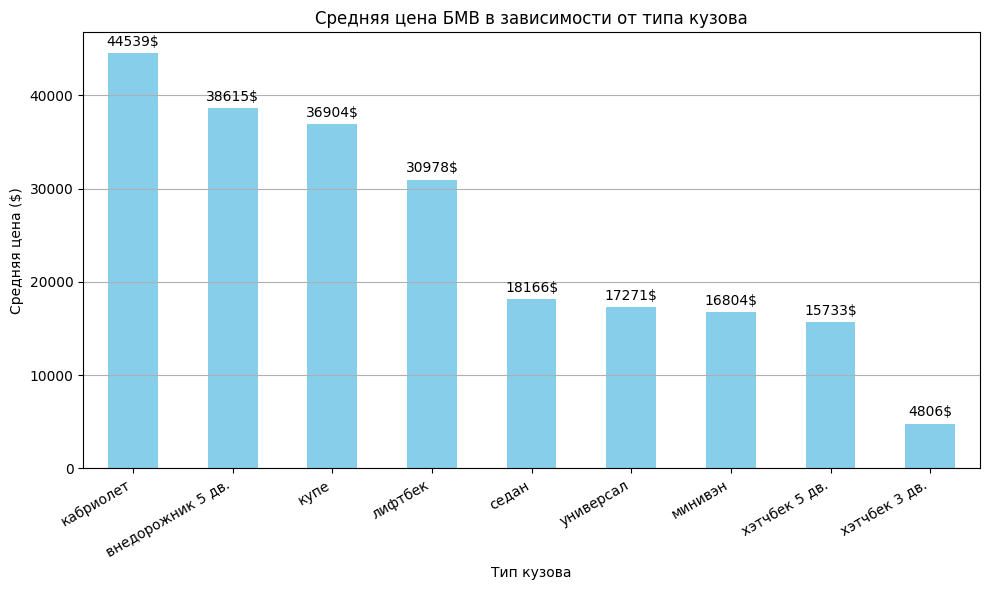

In [51]:
# –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –∫—É–∑–æ–≤–∞
avg_price_by_body = data.groupby('–ö—É–∑–æ–≤')['–¶–µ–Ω–∞'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax = avg_price_by_body.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0], fmt='%.0f$', padding=3)
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ë–ú–í –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –∫—É–∑–æ–≤–∞')
plt.xlabel('–¢–∏–ø –∫—É–∑–æ–≤–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ ($)')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

–ü–æ –¥–∏–∞–≥—Ä–∞–º–º–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –∫—É–∑–æ–≤ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É –∞–≤—Ç–æ–º–æ–±–∏–ª—è, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∫—É–∑–æ–≤–∞ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ +- –æ–¥–Ω–æ–º —Ü–µ–Ω–æ–º —Å–µ–≥–º–µ–Ω—Ç–µ (–Ω-—Ä, —Å–µ–¥–∞–Ω + —É–Ω–∏–≤–µ—Ä—Å–∞–ª + –º–∏–Ω–∏–≤—ç–Ω –∏ –≤–Ω–µ–¥—Ä–æ–∂–Ω–∏–∫ + –∫—É–ø–µ), –∏ –≤–æ—Ç —É–∂–µ –º–µ–∂–¥—É —ç—Ç–∏–º–∏ —Å–µ–≥–º–µ–Ω—Ç–∞–º–∏ —Ä–∞–∑–Ω–∏—Ü–∞ –≤ —Ü–µ–Ω–µ –æ—á–µ–Ω—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞. –ú–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å label encoding –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—é —Å —Å–∞–º–æ–≥–æ –¥–µ—à–µ–≤–æ–≥–æ –∫—É–∑–æ–≤–∞, —Ç–µ–º —Å–∞–º—ã–º –∫–∞–∫ –∏ —Å –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ —Ç–∏–ø–µ –∫–æ—Ä–æ–±–∫–µ, –º–æ–∂–Ω–æ –±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –ø–æ–¥—á–µ—Ä–∫–Ω—É—Ç—å –±–æ–ª—å—à—É—é —Ü–µ–Ω—É. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ, –º–æ–∂–Ω–æ –≤–∑—è—Ç—å –≤–æ –≤–Ω–∞–∏–º–∞–Ω–∏–µ —Ä–∞–∑–±–µ–≥ –≤ —Ü–µ–Ω–∞—Ö –∏ –±–æ–ª–µ–µ –≥—Ä–∞–º–æ—Ç–Ω–æ –ø—Ä–æ—Å—á–∏—Ç–∞—Ç—å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ –∫–æ—ç—Ñ—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã (–≤ –æ–¥–Ω–æ–º —Å–µ–≥–º–µ–Ω—Ç–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –Ω–µ—Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è, –Ω–æ –º–µ–∂–¥—É –∞–≤—Ç–æ–º–æ–±–∏–ª—è–º–∏ –∏–∑ —Ä–∞–∑–Ω—ã—Ö —Ü–µ–Ω–æ–≤—ã—Ö —Å–µ–≥–º–µ–Ω—Ç–æ–≤ —Ä–∞–∑–Ω–∏—Ü–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞).

–ò–Ω—Ç–µ—Ä–µ—Å–∞ —Ä–∞–¥–∏ –ø–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å One-Hot Encoder, —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –ø–æ–ø—Ä–æ–±–æ–∞–≤–∞–ª–∞ —Å–∞–º–∞ –ø–æ–¥–æ–±—Ä–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–µ–∏–Ω—Ç –¥–æ—Ä–æ–≥–æ–≤–∏–∑–Ω—ã –∫–∞–∂–¥–æ–º—É –∫—É–∑–æ–≤—É. –≠—Ç–æ —Å–∏–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏—á, –Ω–æ –ø—Ä–æ–µ–∫—Ç —É—á–µ–±–Ω—ã–π, —Ç–∞–∫ —á—Ç–æ –ø–æ—á–µ–º—É –±—ã –∏ –Ω–µ—Ç?

In [52]:
# 4. –ö—É–∑–æ–≤ ‚Üí One-Hot Encoding
data_encoded = pd.get_dummies(data_encoded, columns=['–ö—É–∑–æ–≤'], prefix='–ö—É–∑–æ–≤', dtype=int)

In [53]:
data_encoded.head()

–°–µ—Ä–∏—è           –ü–æ–∫–æ–ª–µ–Ω–∏–µ   –ì–æ–¥  –†–µ—Å—Ç–∞–π–ª–∏–Ω–≥  –ü—Ä–æ–±–µ–≥  –ö–æ—Ä–æ–±–∫–∞  –û–±—ä–µ–º  \
0  1 —Å–µ—Ä–∏—è                 F40  2019           0  129000        1    1.5   
1  7 —Å–µ—Ä–∏—è                 G12  2019           1   35000        2    3.0   
2  5 —Å–µ—Ä–∏—è                 E39  1999           0  400000        0    2.5   
3  1 —Å–µ—Ä–∏—è  E81, E82, E88, E87  2005           0  370000        2    2.0   
4       X6                 E71  2012           1  149000        2    3.0   

  –¢–æ–ø–ª–∏–≤–æ   –¶–µ–Ω–∞  –ö—É–∑–æ–≤_–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  –ö—É–∑–æ–≤_–∫–∞–±—Ä–∏–æ–ª–µ—Ç  –ö—É–∑–æ–≤_–∫—É–ø–µ  \
0  –¥–∏–∑–µ–ª—å  16999                        0                0           0   
1  –¥–∏–∑–µ–ª—å  83777                        0                0           0   
2  –¥–∏–∑–µ–ª—å   3399                        0                0           0   
3  –±–µ–Ω–∑–∏–Ω   7200                        0                0           0   
4  –±–µ–Ω–∑–∏–Ω  23450                        1                0           0   

   –ö—É–∑–æ–≤_–ª–∏—Ñ—Ç–±–µ–∫  –ö—É–∑–æ–≤_–º–∏–Ω–∏–≤—ç–Ω  –ö—É–∑–æ–≤_—Å–µ–¥–∞–Ω  –ö—É–∑–æ–≤_—É–Ω–∏–≤–µ—Ä—Å–∞–ª  \
0              0              0            0                0   
1              0              0            1                0   
2              0              0            1                0   
3              0              0            0                0   
4              0              0            0                0   

   –ö—É–∑–æ–≤_—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.  –ö—É–∑–æ–≤_—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  
0                    0                    1  
1                    0                    0  
2                    0                    0  
3                    0                    1  
4                    0                    0

### 3. –¢–æ–ø–ª–∏–≤–æ

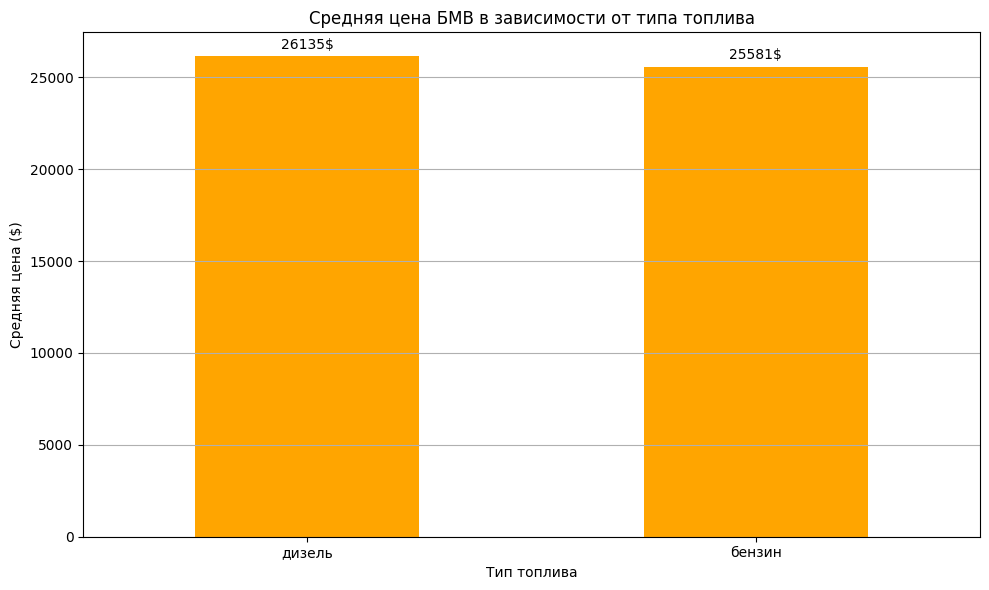

In [54]:
# –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ —Ç–æ–ø–ª–∏–≤–∞
avg_price_by_fuel = data.groupby('–¢–æ–ø–ª–∏–≤–æ')['–¶–µ–Ω–∞'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax = avg_price_by_fuel.plot(kind='bar', color='orange')
ax.bar_label(ax.containers[0], fmt='%.0f$', padding=3)
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ë–ú–í –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ —Ç–æ–ø–ª–∏–≤–∞')
plt.xlabel('–¢–∏–ø —Ç–æ–ø–ª–∏–≤–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ ($)')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [55]:
data['–¢–æ–ø–ª–∏–≤–æ'].value_counts()

–¢–æ–ø–ª–∏–≤–æ
–±–µ–Ω–∑–∏–Ω    1330
–¥–∏–∑–µ–ª—å    1283
Name: count, dtype: int64

–° —Ç–æ–ø–≤–ª–∏–≤–æ–º –æ–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –≤—Å–µ –ø—Ä–æ—Å—Ç–æ: —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –Ω–∞ –¥–∏–∑–µ–ª—å–Ω—ã–µ –∏ –±–µ–Ω–∑–∏–Ω–æ–≤—ã–µ –ë–ú–í –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –Ω–µ—Å–∏–ª—å–Ω–æ, —Ç–∞–∫–∂–µ –≤–∏–¥–∏–º, —á—Ç–æ –æ–±—ä–≤–ª–µ–Ω–∏–π —Å –¥–∞–Ω–Ω—ã–º–∏ –≤–∏–¥–∞–º–∏ —Ç–æ–ø–ª–∏–≤–∞ –ø–æ—Ä–æ–≤–Ω—É, —Ç–∞–∫ —á—Ç–æ –≤–ø–æ–ª–Ω–µ —Å–ø–æ–∫–æ–π–Ω–æ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –Ω–µ –¥–∞–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø–æ–≤—ã—à–µ–Ω–∏–∏\–ø–æ–Ω–∏–∂–µ–Ω–∏–∏ —Ü–µ–Ω—ã. –ö —Ç–æ–º—É –∂–µ –≤–∏–¥ —Ç–æ–ø–ª–∏–≤–∞ –º–æ–∂–µ—Ç –≤—ã—Ç–µ–∫–∞—Ç—å –∏–∑ —Ç–∏–ø–∞ –∫–æ—Ä–æ–±–∫–∏, –∫—É–∑–æ–≤–∞ –∏ —Å–µ—Ä–∏–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–æ–±—Ä–∞—Ç–Ω–æ–µ –≤ –æ–±—â–µ–º —Ç–æ–∂–µ –≤–µ—Ä–Ω–æ).

In [56]:
# –ü–æ–∂–∞–π–ª—É–π –ø–æ–≥–æ—Ä—è—á–∏–ª—Å—è —Å —É–¥–∞–ª–µ–Ω–∏–µ–º —Å—Ç–æ–ª–±—Ü–∞ –¢–æ–ø–ª–∏–≤–æ,
# –º–æ–∂–Ω–æ –Ω–∞–∫—Ä—É—Ç–∏—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–π –∫–æ–º–±–∏–Ω–∞—Ç–æ—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫,
# –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —Ç–æ–ø–ª–∏–≤–∞ –∏ –∫–æ—Ä–æ–±–∫–∏ –ø–µ—Ä–µ–¥–∞—á
# data_encoded.drop(['–¢–æ–ø–ª–∏–≤–æ'], axis=1, inplace=True)

<Figure size 1000x600 with 0 Axes>

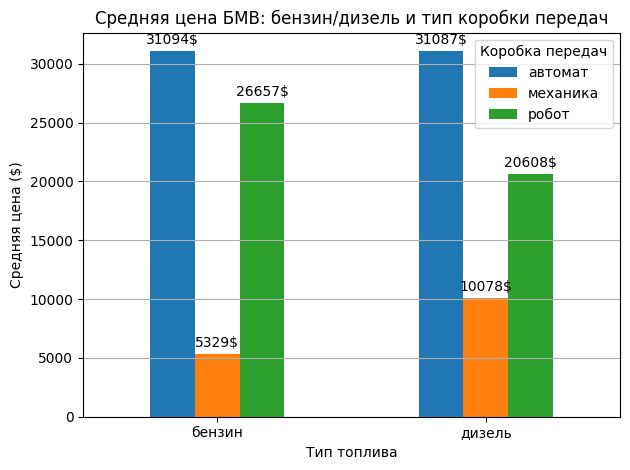

In [57]:
# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω–µ –º–µ–∂–¥—É –±–µ–Ω–∑–∏–Ω–æ–≤—ã–º–∏ –∏ –¥–∏–∑–µ–ª—å–Ω—ã–º–∏ –ë–ú–í –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ—Ä–æ–±–∫–∏ –ø–µ—Ä–µ–¥–∞—á

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ '–¢–æ–ø–ª–∏–≤–æ' –∏ '–ö–æ—Ä–æ–±–∫–∞', —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É
avg_price_fuel_gearbox = data.groupby(['–¢–æ–ø–ª–∏–≤–æ', '–ö–æ—Ä–æ–±–∫–∞'])['–¶–µ–Ω–∞'].mean().unstack()

plt.figure(figsize=(10,6))
ax = avg_price_fuel_gearbox.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f$', padding=3)
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ë–ú–í: –±–µ–Ω–∑–∏–Ω/–¥–∏–∑–µ–ª—å –∏ —Ç–∏–ø –∫–æ—Ä–æ–±–∫–∏ –ø–µ—Ä–µ–¥–∞—á')
plt.xlabel('–¢–∏–ø —Ç–æ–ø–ª–∏–≤–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ ($)')
plt.xticks(rotation=0, ha='center')
plt.legend(title='–ö–æ—Ä–æ–±–∫–∞ –ø–µ—Ä–µ–¥–∞—á')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

–î–∏–∞–≥—Ä–∞–º–º–∞ –≤—ã—à–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –ë–ú–í –Ω–∞ –ê–ö–ü–ü —Å –¥–∏–∑–µ–ª—å–Ω—ã–º –∏ –±–µ–Ω–∑–∏–Ω–æ–≤—ã–º —Ç–æ–ø–ª–∏–≤–æ–º —Å—Ç–æ—è—Ç –æ–¥–∏–Ω–∞–∫–æ–≤–æ, –ø—Ä–∏ —ç—Ç–æ–º –±–µ–Ω–∑–∏–Ω–æ–≤–∞—è –ë–ú–í –≤ 2 —Ä–∞–∑–∞ –¥–µ—à–µ–≤–ª–µ –¥–∏–∑–µ–ª—å–Ω–æ–π. –¢–æ –µ—Å—Ç—å —Å–≤—è–∑–∫–∞ –∏–∑ —Ç–∏–ø–∞ –∫–æ—Ä–æ–±–∫–∏ –∏ —Ç–æ–ø–ª–∏–≤–∞ —Å–µ—Ä—å–µ–∑–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É –º–∞—à–∏–Ω—ã, —Ö–æ—Ç—è –≤ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–æ–ø–ª–∏–≤–µ –Ω–µ –¥–∞–µ—Ç –Ω–∏—á–µ–≥–æ. –≠—Ç—É —Å–≤—è–∑—å –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –æ–ø–∏—Å–∞—Ç—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–Ω–æ–≥–æ—Å–ª–æ–π–Ω–æ–π –ù–°?

In [58]:
data_encoded = pd.get_dummies(data_encoded, columns=['–¢–æ–ø–ª–∏–≤–æ'], prefix='–¢–æ–ø–ª–∏–≤–æ', dtype=int)
data_encoded

–°–µ—Ä–∏—è           –ü–æ–∫–æ–ª–µ–Ω–∏–µ   –ì–æ–¥  –†–µ—Å—Ç–∞–π–ª–∏–Ω–≥  –ü—Ä–æ–±–µ–≥  –ö–æ—Ä–æ–±–∫–∞  –û–±—ä–µ–º  \
0     1 —Å–µ—Ä–∏—è                 F40  2019           0  129000        1    1.5   
1     7 —Å–µ—Ä–∏—è                 G12  2019           1   35000        2    3.0   
2     5 —Å–µ—Ä–∏—è                 E39  1999           0  400000        0    2.5   
3     1 —Å–µ—Ä–∏—è  E81, E82, E88, E87  2005           0  370000        2    2.0   
4          X6                 E71  2012           1  149000        2    3.0   
...       ...                 ...   ...         ...     ...      ...    ...   
2787  3 —Å–µ—Ä–∏—è            G20, G21  2022           1    8540        2    3.0   
2788       X6                 E71  2011           0  277000        2    3.0   
2789  5 —Å–µ—Ä–∏—è            F10, F11  2012           0  256000        2    3.0   
2790  4 —Å–µ—Ä–∏—è       F32, F33, F36  2013           0  268500        2    2.0   
2791  2 —Å–µ—Ä–∏—è                 F45  2017           0  200000        0    1.5   

       –¶–µ–Ω–∞  –ö—É–∑–æ–≤_–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  –ö—É–∑–æ–≤_–∫–∞–±—Ä–∏–æ–ª–µ—Ç  –ö—É–∑–æ–≤_–∫—É–ø–µ  \
0     16999                        0                0           0   
1     83777                        0                0           0   
2      3399                        0                0           0   
3      7200                        0                0           0   
4     23450                        1                0           0   
...     ...                      ...              ...         ...   
2787  59990                        0                0           0   
2788  22290                        1                0           0   
2789  23500                        0                0           0   
2790  21500                        0                0           1   
2791  13000                        0                0           0   

      –ö—É–∑–æ–≤_–ª–∏—Ñ—Ç–±–µ–∫  –ö—É–∑–æ–≤_–º–∏–Ω–∏–≤—ç–Ω  –ö—É–∑–æ–≤_—Å–µ–¥–∞–Ω  –ö—É–∑–æ–≤_—É–Ω–∏–≤–µ—Ä—Å–∞–ª  \
0                 0              0            0                0   
1                 0              0            1                0   
2                 0              0            1                0   
3                 0              0            0                0   
4                 0              0            0                0   
...             ...            ...          ...              ...   
2787              0              0            1                0   
2788              0              0            0                0   
2789              0              0            1                0   
2790              0              0            0                0   
2791              0              1            0                0   

      –ö—É–∑–æ–≤_—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.  –ö—É–∑–æ–≤_—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  –¢–æ–ø–ª–∏–≤–æ_–±–µ–Ω–∑–∏–Ω  –¢–æ–ø–ª–∏–≤–æ_–¥–∏–∑–µ–ª—å  
0                       0                    1               0               1  
1                       0                    0               0               1  
2                       0                    0               0               1  
3                       0                    1               1               0  
4                       0                    0               1               0  
...                   ...                  ...             ...             ...  
2787                    0                    0               1               0  
2788                    0                    0               0               1  
2789                    0                    0               0               1  
2790                    0                    0               1               0  
2791                    0                    0               0               1  

[2613 rows x 19 columns]

### 4. –°–µ—Ä–∏—è –∏ –ø–æ–∫–æ–ª–µ–Ω–∏–µ

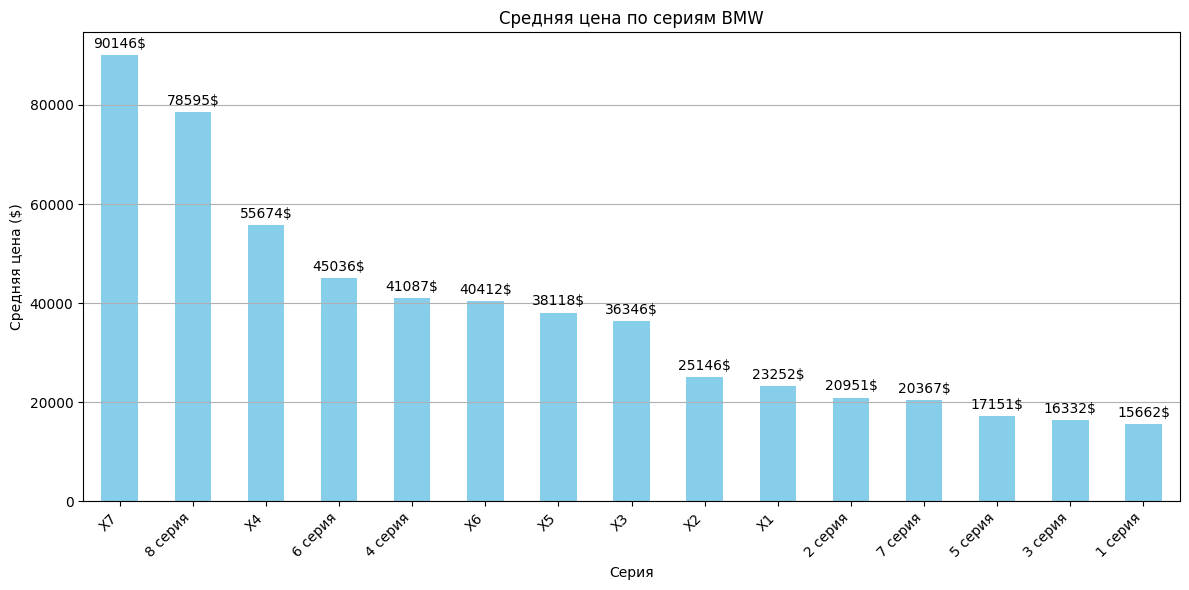

In [59]:
# –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ø–æ —Å–µ—Ä–∏—è–º –ë–ú–í
avg_price_by_series = data.groupby('–°–µ—Ä–∏—è')['–¶–µ–Ω–∞'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = avg_price_by_series.plot(kind='bar', color='skyblue')
for container in ax.containers if hasattr(ax, 'containers') else []:
    ax.bar_label(container, fmt='%.0f$', padding=3)
plt.title('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ø–æ —Å–µ—Ä–∏—è–º BMW')
plt.xlabel('–°–µ—Ä–∏—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

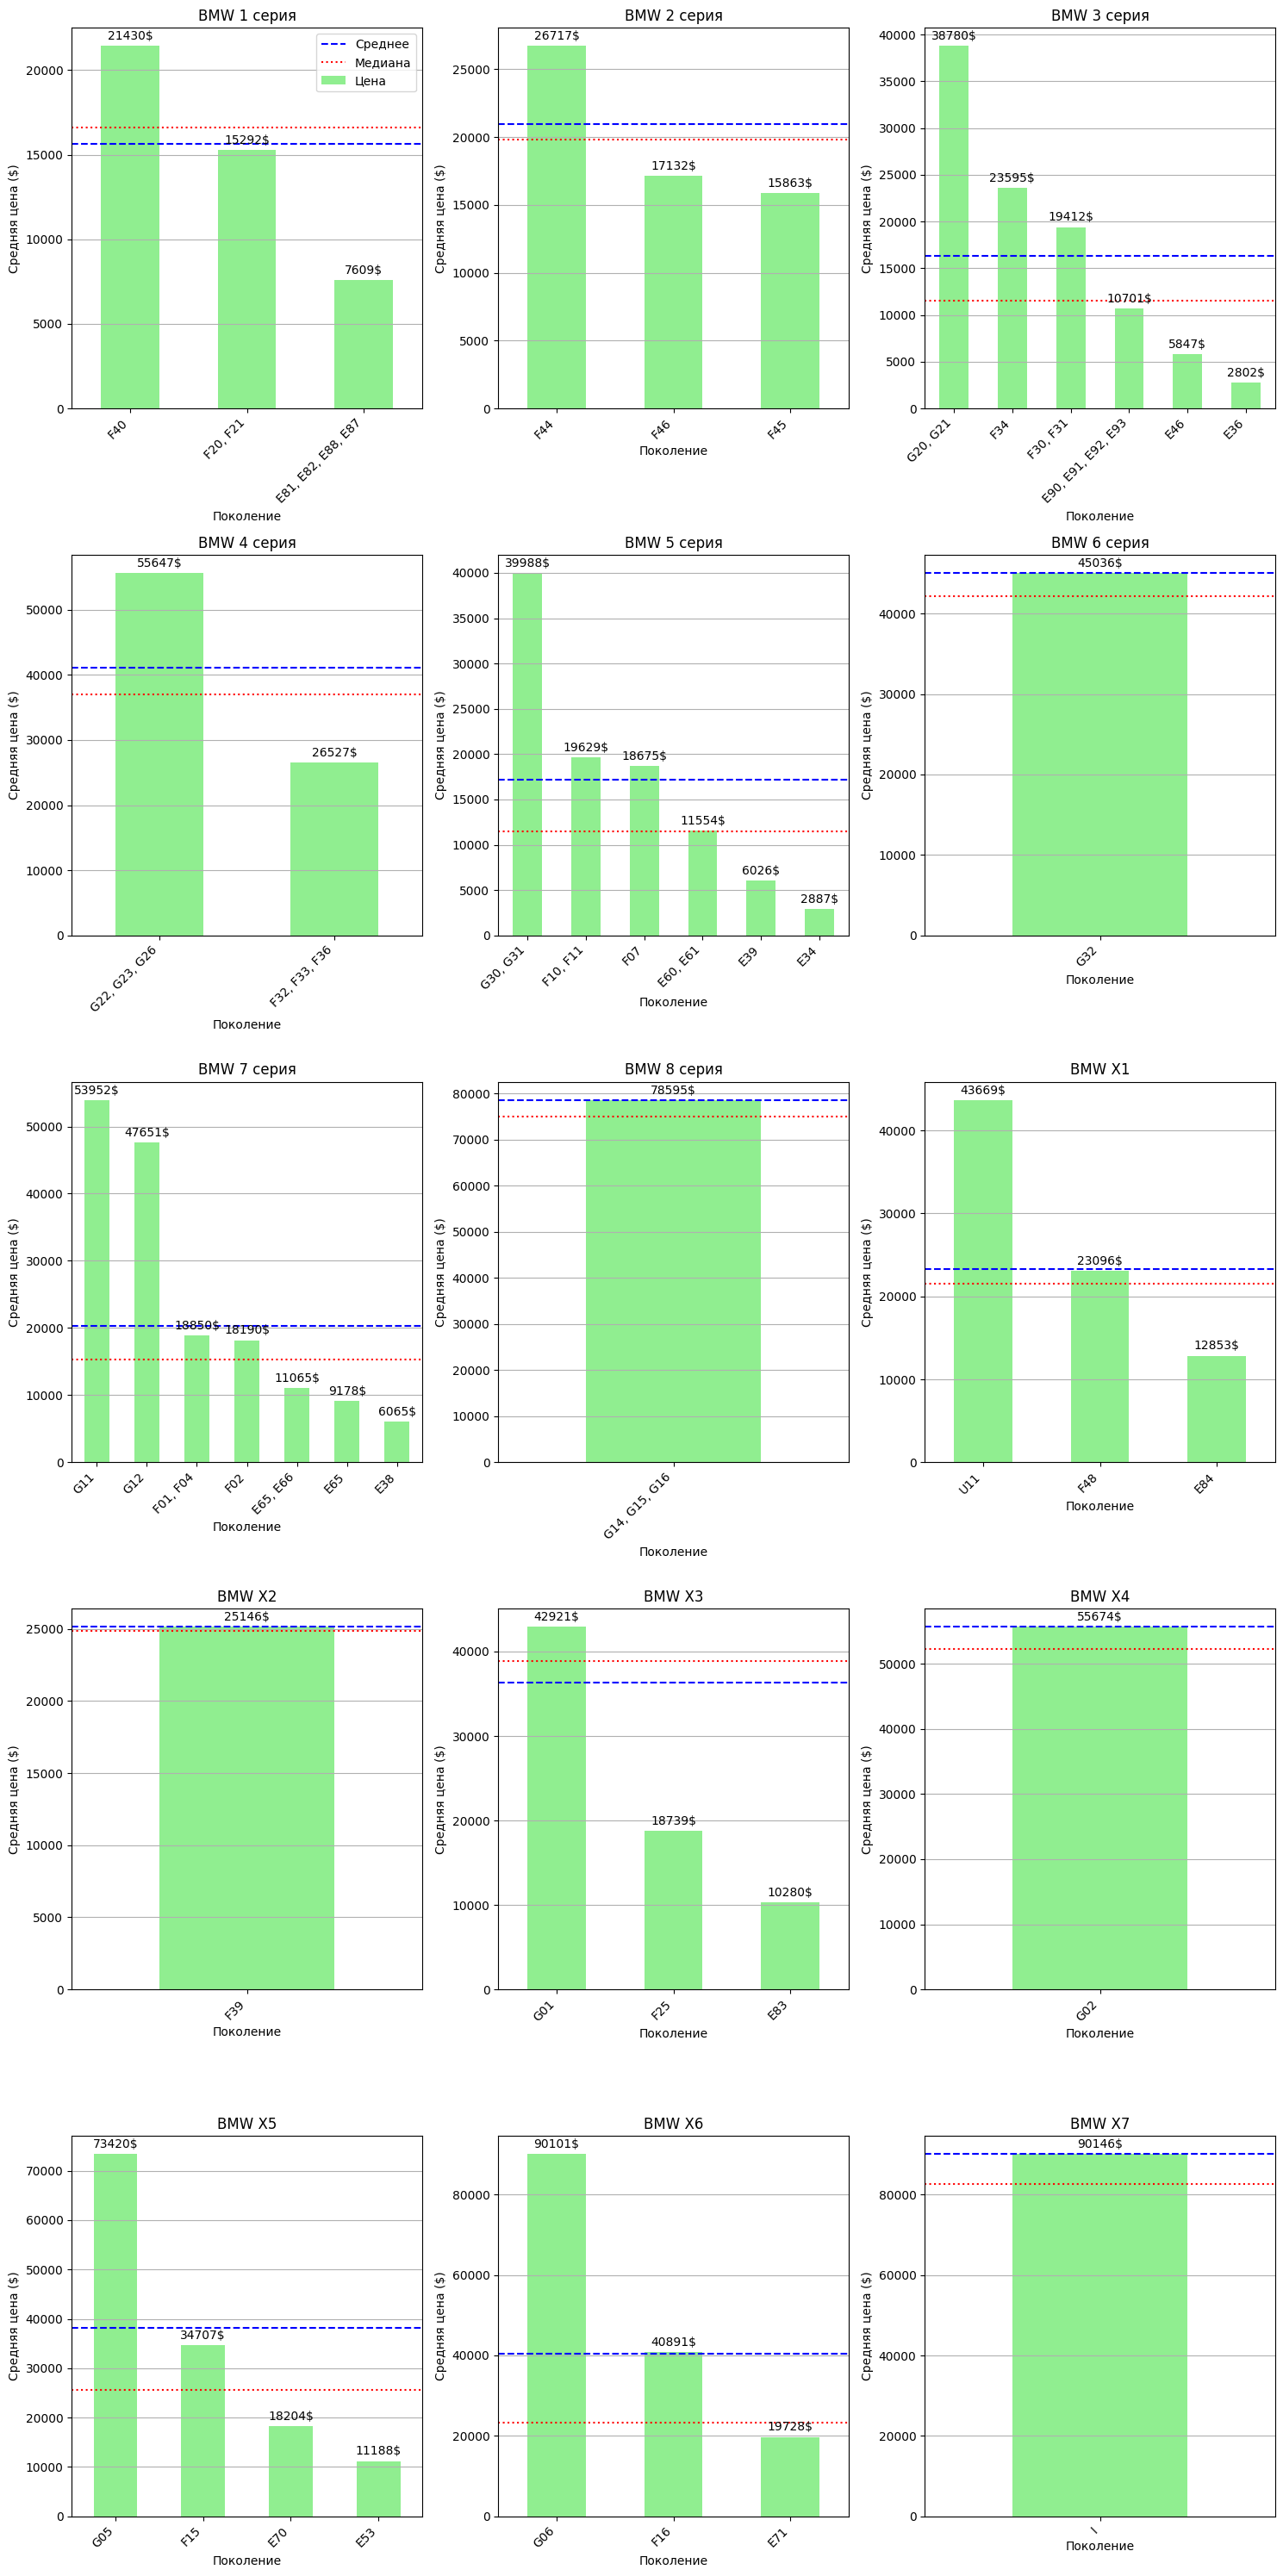

In [60]:
# –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ø–æ —Å–µ—Ä–∏—è–º –∏ –ø–æ–∫–æ–ª–µ–Ω–∏—è–º –ë–ú–í

series_list = data['–°–µ—Ä–∏—è'].unique()
series_list.sort()
n_series = len(series_list)

# –û–ø—Ä–µ–¥–µ–ª–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ –∏ —Å—Ç—Ä–æ–∫ –¥–ª—è —Å–µ—Ç–∫–∏
n_cols = 3  # –Ω–∞–ø—Ä–∏–º–µ—Ä, 3 —Å—Ç–æ–ª–±—Ü–∞
n_rows = n_series // n_cols + (1 if n_series % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*6))
axes = axes.flatten()  # –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –∏–Ω–¥–µ–∫—Å–∞—Ü–∏–∏

for idx, series in enumerate(series_list):
    ax = axes[idx]
    series_data = data[data['–°–µ—Ä–∏—è'] == series]
    avg_price_by_generation = series_data.groupby('–ü–æ–∫–æ–ª–µ–Ω–∏–µ')['–¶–µ–Ω–∞'].mean().sort_values(ascending=False)
    avg_price_by_generation.plot(kind='bar', color='lightgreen', ax=ax)
    for container in ax.containers if hasattr(ax, 'containers') else []:
        ax.bar_label(container, fmt='%.0f$', padding=3)
    # –î–æ–±–∞–≤–∏–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏ —Å—Ä–µ–¥–Ω–µ–π –∏ –º–µ–¥–∏–∞–Ω—ã –ø–æ —Å–µ—Ä–∏–∏
    mean_price = series_data['–¶–µ–Ω–∞'].mean()
    median_price = series_data['–¶–µ–Ω–∞'].median()
    ax.axhline(mean_price, color='blue', linestyle='--', linewidth=1.5, label='–°—Ä–µ–¥–Ω–µ–µ')
    ax.axhline(median_price, color='red', linestyle=':', linewidth=1.5, label='–ú–µ–¥–∏–∞–Ω–∞')
    ax.set_title(f'BMW {series}')
    ax.set_xlabel('–ü–æ–∫–æ–ª–µ–Ω–∏–µ')
    ax.set_ylabel('–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ ($)')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')
    ax.set_ylim(bottom=0)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')
    # –î–æ–±–∞–≤–∏–º –ª–µ–≥–µ–Ω–¥—É —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ —ç—Ç–æ –ø–µ—Ä–≤—ã–π –≥—Ä–∞—Ñ–∏–∫
    if idx == 0:
        ax.legend()

# –û—Ç–∫–ª—é—á–∏–º –ø—É—Å—Ç—ã–µ –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫–∏, –µ—Å–ª–∏ –µ—Å—Ç—å
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [61]:
encoder = TargetEncoder(smooth=10, cv=5, target_type='continuous')  # –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
data_encoded['–ü–æ–∫–æ–ª–µ–Ω–∏–µ'] = encoder.fit_transform(
    data['–ü–æ–∫–æ–ª–µ–Ω–∏–µ'].values.reshape(-1, 1), 
    data['–¶–µ–Ω–∞'].values).astype(int)

data_encoded['–°–µ—Ä–∏—è'] = encoder.fit_transform(
    data['–°–µ—Ä–∏—è'].values.reshape(-1, 1), 
    data['–¶–µ–Ω–∞'].values).astype(int)

data_encoded

–°–µ—Ä–∏—è  –ü–æ–∫–æ–ª–µ–Ω–∏–µ   –ì–æ–¥  –†–µ—Å—Ç–∞–π–ª–∏–Ω–≥  –ü—Ä–æ–±–µ–≥  –ö–æ—Ä–æ–±–∫–∞  –û–±—ä–µ–º   –¶–µ–Ω–∞  \
0     17140      22517  2019           0  129000        1    1.5  16999   
1     20542      40126  2019           1   35000        2    3.0  83777   
2     17574       7029  1999           0  400000        0    2.5   3399   
3     17681      13564  2005           0  370000        2    2.0   7200   
4     39427      21047  2012           1  149000        2    3.0  23450   
...     ...        ...   ...         ...     ...      ...    ...    ...   
2787  15881      36993  2022           1    8540        2    3.0  59990   
2788  38714      21047  2011           0  277000        2    3.0  22290   
2789  17574      20410  2012           0  256000        2    3.0  23500   
2790  38991      26413  2013           0  268500        2    2.0  21500   
2791  21440      19731  2017           0  200000        0    1.5  13000   

      –ö—É–∑–æ–≤_–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  –ö—É–∑–æ–≤_–∫–∞–±—Ä–∏–æ–ª–µ—Ç  –ö—É–∑–æ–≤_–∫—É–ø–µ  –ö—É–∑–æ–≤_–ª–∏—Ñ—Ç–±–µ–∫  \
0                           0                0           0              0   
1                           0                0           0              0   
2                           0                0           0              0   
3                           0                0           0              0   
4                           1                0           0              0   
...                       ...              ...         ...            ...   
2787                        0                0           0              0   
2788                        1                0           0              0   
2789                        0                0           0              0   
2790                        0                0           1              0   
2791                        0                0           0              0   

      –ö—É–∑–æ–≤_–º–∏–Ω–∏–≤—ç–Ω  –ö—É–∑–æ–≤_—Å–µ–¥–∞–Ω  –ö—É–∑–æ–≤_—É–Ω–∏–≤–µ—Ä—Å–∞–ª  –ö—É–∑–æ–≤_—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.  \
0                 0            0                0                    0   
1                 0            1                0                    0   
2                 0            1                0                    0   
3                 0            0                0                    0   
4                 0            0                0                    0   
...             ...          ...              ...                  ...   
2787              0            1                0                    0   
2788              0            0                0                    0   
2789              0            1                0                    0   
2790              0            0                0                    0   
2791              1            0                0                    0   

      –ö—É–∑–æ–≤_—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  –¢–æ–ø–ª–∏–≤–æ_–±–µ–Ω–∑–∏–Ω  –¢–æ–ø–ª–∏–≤–æ_–¥–∏–∑–µ–ª—å  
0                       1               0               1  
1                       0               0               1  
2                       0               0               1  
3                       1               1               0  
4                       0               1               0  
...                   ...             ...             ...  
2787                    0               1               0  
2788                    0               0               1  
2789                    0               0               1  
2790                    0               1               0  
2791                    0               0               1  

[2613 rows x 19 columns]

### –ò—Ç–æ–≥–∏ 

–ü—Ä–∏–º–µ–Ω–∏–ª–∏ —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
1. `–ö–æ—Ä–æ–±–∫–∞` - **Label Encoding**, —Ç.–∫. –µ—Å—Ç—å –ø–æ—Ä—è–¥–æ–∫ –ø–æ —Ü–µ–Ω–µ (–º–µ—Ö–∞–Ω–∏–∫–∞ < –∞–≤—Ç–æ–º–∞—Ç < —Ä–æ–±–æ—Ç).
2. `–ö—É–∑–æ–≤` - **One-Hot Encoding**, —Ö–æ—Ç—è –∑–¥–µ—Å—å —Ç–∞–∫ –Ω–∞–ø—Ä–∞—à–∏–≤–∞–µ—Ç—Å—è **Label Encoding**, —Ç–∞–∫ –∫–∞–∫ —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –Ω–∞ –∫—É–∑–æ–≤–∞ —Ç–∏–ø–∞ –∫–∞–±—Ä–∏–æ–ª–µ—Ç–∞ —Ü–µ–Ω–∞ –æ—á–µ–≤–∏–¥–Ω–æ –¥–æ—Ä–æ–∂–µ, –≤ –∂–µ –≤—Ä–µ–º—è –±–∞–∑–æ–≤—ã–µ —Å–µ–¥–∞–Ω—ã –∏ –≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫–∏ –¥–µ—à–µ–≤–ª–µ (–ø–æ —Å—É—Ç–∏ —Å–≤—è–∑–∞–Ω–æ —Å –º–∞—Å—Å–æ–≤–æ—Å—Ç—å—é –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞). –ë—ã–ª –≤—ã–±—Ä–∞–Ω **One-Hot Encoding**, —á—Ç–æ–±—ã –ø–æ—Å–º–æ—Ä–µ—Ç—å, —É–≤–∏–¥–∏—Ç –ª–∏ –º–æ–¥–µ–ª—å –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, –∫–∞–∫–∏–µ –∏–∑ –∫—É–∑–æ–≤ —è–≤–ª—è—é—Ç—Å—è –±–æ–ª–µ–µ –¥–æ—Ä–æ–≥–∏–º–∏.
3. `–¢–æ–ø–ª–∏–≤–æ` -  **One-Hot Encoding**, –±—ã–ª–∞ –∑–∞–º–µ—á–µ–Ω–∞ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤ —Ü–µ–Ω–µ, –µ—Å–ª–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –≤ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ —Å `–ö–æ—Ä–æ–±–∫–æ–π`.
4. `–°–µ—Ä–∏—è –∏ –ø–æ–∫–æ–ª–µ–Ω–∏–µ` - –æ–±–∞ –ø—Ä–∏ –ø–æ–º–æ—â–∏ **Target Encoding**, —Å–∫–æ—Ä–µ–µ –Ω–µ –ª—É—á—à–µ–µ —Ä–µ—à–µ–Ω–∏–µ, –Ω–æ —ç—Ç–æ –±—ã–ª–æ —á—Ç–æ-—Ç–æ –Ω–æ–≤–æ–µ –¥–ª—è –º–µ–Ω—è –∏ –≤—Å–µ-—Ç–∞–∫–∏ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª. –°—É—Ç—å –≤ —Ç–æ–º, —á—Ç–æ –±—É–∫–≤–∞–ª—å–Ω–æ –∑–∞–º–µ–Ω–∏–ª–∏ –Ω–∞–∑–≤–∞–Ω–∏—è –Ω–∞ —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –ø–æ –¥–∞–Ω–Ω–æ–π –≥—Ä—É–ø–ø–µ, –ø—Ä–∏—á–µ–º –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–±–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–µ–ø–µ—Ä–µ—Å–µ–∫–∞—é—â–∏—Ö—Å—è —Ñ–æ–ª–¥–æ–≤, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –≤ –±—É–¥—É—â–µ–º.

–ü—Ä–∏–º–µ—á–∞–Ω–∏—è:
- –ö —Ñ–∏—á–∞–º `–û–±—ä–µ–º` (–¥–≤–∏–≥–∞—Ç–µ–ª—è) –∏ `–ü—Ä–æ–±–µ–≥` –º–æ–∂–Ω–æ —Ç–æ–∂–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫–∞–∫ –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º, –ø–æ–∫–∞ —á—Ç–æ —ç—Ç–æ—Ç –º–æ–º–µ–º–µ–Ω—Ç –ø—Ä–æ–ø—É—Å—Ç–∏–º, —á—Ç–æ–±—ã –Ω–∞–∫–æ–Ω–µ—Ü –ø–µ—Ä–µ–π—Ç–∏ –∫ —ç—Ç–∞–ø—É –ø–æ–¥–±–æ—Ä–∞ –º–æ–¥–µ–ª–µ–π –∏ –æ–±—É—á–µ–Ω–∏—è.
- –ù—É –≤—Å–µ –ø–æ–≥–Ω–∞–ª–∏ –º—É—á–∞—Ç—å –∫–æ–º–ø–∏–∫ –∏—Ç–µ—Ä–∞—Ü–∏—è–º–∏ –æ–±—É—á–µ–Ω–∏—è, —è –¥—É–º–∞—é —Å–∫–æ—Ä–æ –≤–µ—Ä–Ω—É—Å—å –∫ —ç—Ç–æ–º—É –±–ª–æ–∫–Ω–æ—Ç—É —Å –∞–Ω–∞–ª–∏–∑–æ–º, —Ç–∞–∫ –∫–∞–∫ –Ω–∏—Ñ–∏–≥–∞ –¥–µ–ª—å–Ω–æ–≥–æ –Ω–µ –≤—ã–π–¥–µ—Ç) üòÅüòÅüòÅ

## –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [62]:
data_encoded.head()

–°–µ—Ä–∏—è  –ü–æ–∫–æ–ª–µ–Ω–∏–µ   –ì–æ–¥  –†–µ—Å—Ç–∞–π–ª–∏–Ω–≥  –ü—Ä–æ–±–µ–≥  –ö–æ—Ä–æ–±–∫–∞  –û–±—ä–µ–º   –¶–µ–Ω–∞  \
0  17140      22517  2019           0  129000        1    1.5  16999   
1  20542      40126  2019           1   35000        2    3.0  83777   
2  17574       7029  1999           0  400000        0    2.5   3399   
3  17681      13564  2005           0  370000        2    2.0   7200   
4  39427      21047  2012           1  149000        2    3.0  23450   

   –ö—É–∑–æ–≤_–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  –ö—É–∑–æ–≤_–∫–∞–±—Ä–∏–æ–ª–µ—Ç  –ö—É–∑–æ–≤_–∫—É–ø–µ  –ö—É–∑–æ–≤_–ª–∏—Ñ—Ç–±–µ–∫  \
0                        0                0           0              0   
1                        0                0           0              0   
2                        0                0           0              0   
3                        0                0           0              0   
4                        1                0           0              0   

   –ö—É–∑–æ–≤_–º–∏–Ω–∏–≤—ç–Ω  –ö—É–∑–æ–≤_—Å–µ–¥–∞–Ω  –ö—É–∑–æ–≤_—É–Ω–∏–≤–µ—Ä—Å–∞–ª  –ö—É–∑–æ–≤_—Ö—ç—Ç—á–±–µ–∫ 3 –¥–≤.  \
0              0            0                0                    0   
1              0            1                0                    0   
2              0            1                0                    0   
3              0            0                0                    0   
4              0            0                0                    0   

   –ö—É–∑–æ–≤_—Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  –¢–æ–ø–ª–∏–≤–æ_–±–µ–Ω–∑–∏–Ω  –¢–æ–ø–ª–∏–≤–æ_–¥–∏–∑–µ–ª—å  
0                    1               0               1  
1                    0               0               1  
2                    0               0               1  
3                    1               1               0  
4                    0               1               0

In [63]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613 entries, 0 to 2791
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   –°–µ—Ä–∏—è                    2613 non-null   int64  
 1   –ü–æ–∫–æ–ª–µ–Ω–∏–µ                2613 non-null   int64  
 2   –ì–æ–¥                      2613 non-null   int64  
 3   –†–µ—Å—Ç–∞–π–ª–∏–Ω–≥               2613 non-null   int64  
 4   –ü—Ä–æ–±–µ–≥                   2613 non-null   int64  
 5   –ö–æ—Ä–æ–±–∫–∞                  2613 non-null   int8   
 6   –û–±—ä–µ–º                    2613 non-null   float64
 7   –¶–µ–Ω–∞                     2613 non-null   int64  
 8   –ö—É–∑–æ–≤_–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.  2613 non-null   int64  
 9   –ö—É–∑–æ–≤_–∫–∞–±—Ä–∏–æ–ª–µ—Ç          2613 non-null   int64  
 10  –ö—É–∑–æ–≤_–∫—É–ø–µ               2613 non-null   int64  
 11  –ö—É–∑–æ–≤_–ª–∏—Ñ—Ç–±–µ–∫            2613 non-null   int64  
 12  –ö—É–∑–æ–≤_–º–∏–Ω–∏–≤—ç–Ω          

In [64]:
data_encoded.to_csv("../data/bmw_encoded.csv", index=False)